In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = {
    "Order_ID": [1001, 1002, 1003, 1004, 1005, 1006],
    "Product": ["Laptop", "Headphones", "Keyboard", "Monitor", "Laptop", "Mouse"],
    "Category": ["Electronics", "Electronics", "Accessories", "Electronics", "Electronics", "Accessories"],
    "Price": [800, 50, 30, 200, 850, 20],
    "Quantity": [1, 2, 3, 1, 1, 4],
    "Order_Date": pd.to_datetime(["2023-01-10", "2023-01-15", "2023-01-18", "2023-01-20", "2023-02-05", "2023-02-07"]),
    "Customer_City": ["Karachi", "Lahore", "Islamabad", "Karachi", "Lahore", "Karachi"]
}
ds = pd.DataFrame(data)
ds

,Order_ID,Product,Category,Price,Quantity,Order_Date,Customer_City
0,1001,Laptop,Electronics,800,1,2023-01-10,Karachi
1,1002,Headphones,Electronics,50,2,2023-01-15,Lahore
2,1003,Keyboard,Accessories,30,3,2023-01-18,Islamabad
3,1004,Monitor,Electronics,200,1,2023-01-20,Karachi
4,1005,Laptop,Electronics,850,1,2023-02-05,Lahore
5,1006,Mouse,Accessories,20,4,2023-02-07,Karachi


In [3]:
check = ds.isnull().sum()
check

Order_ID         0
Product          0
Category         0
Price            0
Quantity         0
Order_Date       0
Customer_City    0
dtype: int64

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       6 non-null      int64         
 1   Product        6 non-null      object        
 2   Category       6 non-null      object        
 3   Price          6 non-null      int64         
 4   Quantity       6 non-null      int64         
 5   Order_Date     6 non-null      datetime64[ns]
 6   Customer_City  6 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 468.0+ bytes


In [5]:
ds["datetime"] = pd.to_datetime(ds['Order_Date'])
ds

,Order_ID,Product,Category,Price,Quantity,Order_Date,Customer_City,datetime
0,1001,Laptop,Electronics,800,1,2023-01-10,Karachi,2023-01-10
1,1002,Headphones,Electronics,50,2,2023-01-15,Lahore,2023-01-15
2,1003,Keyboard,Accessories,30,3,2023-01-18,Islamabad,2023-01-18
3,1004,Monitor,Electronics,200,1,2023-01-20,Karachi,2023-01-20
4,1005,Laptop,Electronics,850,1,2023-02-05,Lahore,2023-02-05
5,1006,Mouse,Accessories,20,4,2023-02-07,Karachi,2023-02-07


In [6]:
ds['Total_revenue'] = ds['Price'] * ds['Quantity']
ds

,Order_ID,Product,Category,Price,Quantity,Order_Date,Customer_City,datetime,Total_revenue
0,1001,Laptop,Electronics,800,1,2023-01-10,Karachi,2023-01-10,800
1,1002,Headphones,Electronics,50,2,2023-01-15,Lahore,2023-01-15,100
2,1003,Keyboard,Accessories,30,3,2023-01-18,Islamabad,2023-01-18,90
3,1004,Monitor,Electronics,200,1,2023-01-20,Karachi,2023-01-20,200
4,1005,Laptop,Electronics,850,1,2023-02-05,Lahore,2023-02-05,850
5,1006,Mouse,Accessories,20,4,2023-02-07,Karachi,2023-02-07,80


In [7]:
def Total_revenue():
    total_revenue = 0
    for revenue in ds['Total_revenue']:
        total_revenue+= revenue
    return total_revenue


print(f"Total revenue is ",Total_revenue())

Total revenue is  2120


In [8]:
average_ordervalue = ds['Total_revenue'].mean()
print(f"average order value is ", average_ordervalue)

average order value is  353.3333333333333


In [9]:
Total_order = ds["Order_ID"].nunique()
print(f"Total order is ", Total_order)

Total order is  6


In [10]:
Top_salling_product = ds.groupby('Product')['Quantity'].sum().sort_values(ascending= False).head()
print(f"Top saling product",Top_salling_product)

Top saling product Product
Mouse         4
Keyboard      3
Headphones    2
Laptop        2
Monitor       1
Name: Quantity, dtype: int64


In [11]:
product_revenue = ds.groupby('Product')['Total_revenue'].sum().idxmax()
print(f"Top category by revenue : ", product_revenue)

Top category by revenue :  Laptop


In [12]:
ds['month'] = ds['datetime'].dt.to_period('M')
monthly_revenue = ds.groupby('month')['Total_revenue'].sum()
monthly_revenue


month
2023-01    1190
2023-02     930
Freq: M, Name: Total_revenue, dtype: int64

In [13]:
highist_monthly_revenue = monthly_revenue.idxmax()
max_revenue = monthly_revenue.max()
print(f"Highest revenue was in {highist_monthly_revenue} with amount{max_revenue}")

Highest revenue was in 2023-01 with amount1190


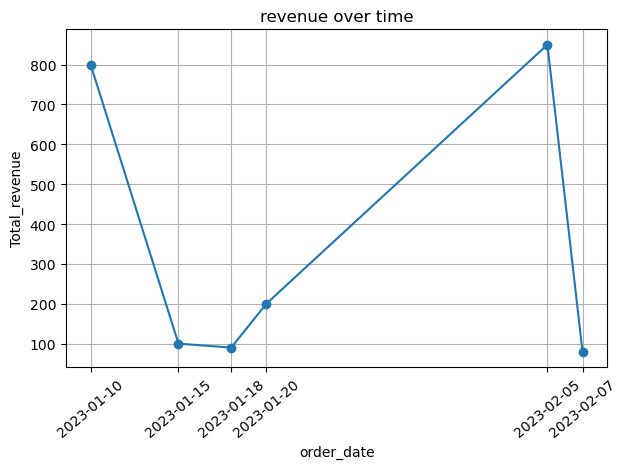

In [14]:
plt.plot(ds['Order_Date'],ds['Total_revenue'],marker = "o",)
plt.xticks(ds['Order_Date'],rotation=40)
plt.title("revenue over time")
plt.xlabel("order_date")
plt.ylabel("Total_revenue")
plt.grid(True)
plt.tight_layout() 
plt.show()

In [15]:
highest_order_city = ds.groupby('Customer_City')['Order_ID'].nunique()
order = highest_order_city.sort_values(ascending=False).head(1)
print(order)

Customer_City
Karachi    3
Name: Order_ID, dtype: int64


In [16]:
city_revenue = ds.groupby('Customer_City')['Total_revenue'].sum()
top_city = city_revenue.idxmax()
top_revenue = city_revenue.max()
print(f" {top_city} earned the most revenue {top_revenue}")

 Karachi earned the most revenue 1080


In [17]:
city_revnue = ds.groupby('Customer_City')['Total_revenue'].sum()
city_revenue

Customer_City
Islamabad      90
Karachi      1080
Lahore        950
Name: Total_revenue, dtype: int64

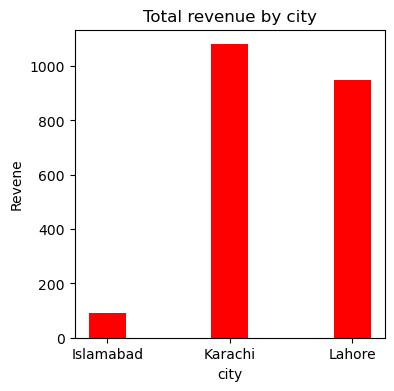

In [18]:
plt.figure(figsize = (4,4))
plt.bar(city_revnue.index,city_revnue.values,width = 0.3,color = "red")
plt.title("Total revenue by city")
plt.xlabel("city")
plt.ylabel("Revene")
plt.show()

In [19]:
average_pricebycetegory = ds.groupby('Category')['Price'].mean()
average_pricebycetegory

Category
Accessories     25.0
Electronics    475.0
Name: Price, dtype: float64

In [46]:
unique_product = ds['Product'].nunique()
unique_product

5

In [62]:
ds['highrevenue_product'] = ds['Quantity'] / ds['Total_revenue']
ds.loc[ds['highrevenue_product'].idxmax()]

Order_ID                              1006
Product                              Mouse
Category                       Accessories
Price                                   20
Quantity                                 4
Order_Date             2023-02-07 00:00:00
Customer_City                      Karachi
datetime               2023-02-07 00:00:00
Total_revenue                           80
month                              2023-02
highrevenue_product                   0.05
Name: 5, dtype: object

In [51]:
highproduct_revenue = ds.groupby('Product')['Total_revenue'].sum().sort_values(ascending = False).head(5)
highproduct_revenue

Product
Laptop        1650
Monitor        200
Headphones     100
Keyboard        90
Mouse           80
Name: Total_revenue, dtype: int64

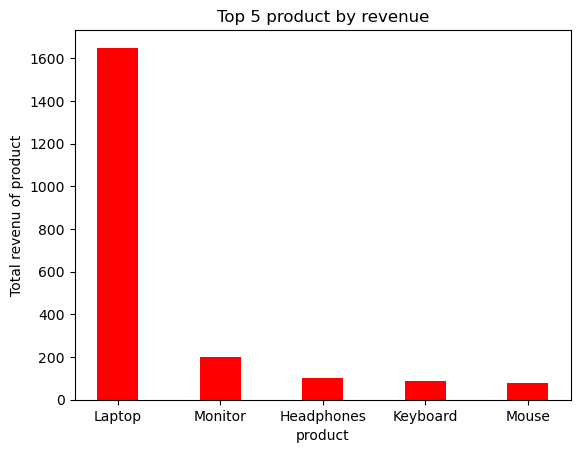

In [61]:
plt.bar(highproduct_revenue.index,highproduct_revenue.values,width = 0.4,color = "red")
plt.title("Top 5 product by revenue")
plt.xlabel("product")
plt.ylabel("Total revenu of product")
plt.show()


In [63]:
revenue_product_category = ds.groupby('Category')['Total_revenue'].sum()
revenue_product_category

Category
Accessories     170
Electronics    1950
Name: Total_revenue, dtype: int64

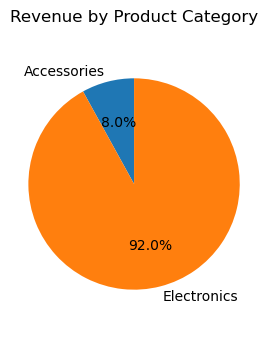

In [75]:

plt.figure(figsize=(3, 4))
plt.pie(revenue_product_category, labels=revenue_product_category.index, autopct='%1.1f%%', startangle=90)
plt.title("Revenue by Product Category")
plt.axis('equal')  
plt.show()

           

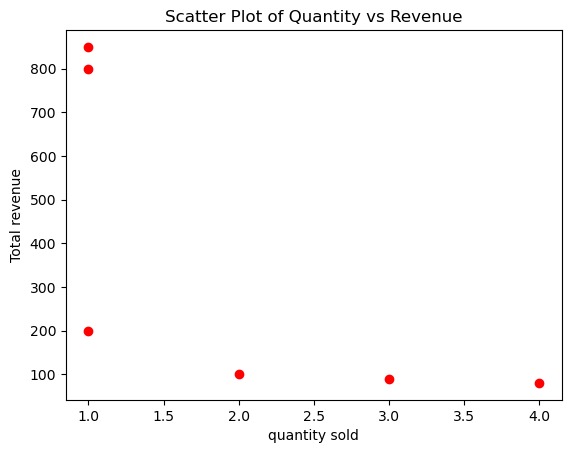

In [89]:
plt.scatter(ds["Quantity"],ds['Total_revenue'],color= "red",marker = "o")
plt.title("Scatter Plot of Quantity vs Revenue")
plt.xlabel("quantity sold")
plt.ylabel("Total revenue")
plt.show()